# **Estudio de la relación de la calidad del Servicio de Salud con la Previsión de Salud**

In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
archivo_csv = "GRD_PUBLICO_2023.csv"
df = pd.read_csv(archivo_csv, sep='|', on_bad_lines='skip', engine='python', encoding='utf-16')
print(f"Datos cargados exitosamente: {df.shape[0]:,} registros")




display(df.head(5))

Datos cargados exitosamente: 1,039,587 registros


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,ETNIA,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,...,FECHAPROCEDIMIENTO1,FECHAINTERV1,ESPECIALIDADINTERVENCION,MEDICOALTA_ENCRIPTADO,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,HOSPPROCEDENCIA
0,122100,72196813,HOMBRE,1980-04-13,OTRO,VALDIVIA,PANGUIPULLI,CHILE,FONASA INSTITUCIONAL - (MAI) A,VALDIVIA,...,NaN,NaN,NaN,87553213,NaN,064161,"0,7094",1,1,NaN
1,114101,DESCONOCIDO,HOMBRE,2001-11-04,OTRO,CORDILLERA,PUENTE ALTO,VENEZUELA (REPÚBLICA BOLIVARIANA DE),PARTICULAR,METROPOLITANO SURORIENTE,...,NaN,NaN,NaN,86895434,1.0,041301,"1,0869",1,1,NaN
2,114101,97627974,HOMBRE,2020-07-30,OTRO,CORDILLERA,PUENTE ALTO,CHILE,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,...,NaN,NaN,NaN,73227424,NaN,044161,"0,4084",1,1,NaN
3,106103,67770674,MUJER,1978-11-14,OTRO,SAN ANTONIO,SAN ANTONIO,CHILE,FONASA INSTITUCIONAL - (MAI) C,VALPARAISO SAN ANTONIO,...,NaN,25-05-2023,OBSTETRICIA Y GINECOLOGÍA,71695588,1.0,131301,"0,6406",1,1,NaN
4,106103,100390800,MUJER,2023-12-20,OTRO,SAN ANTONIO,SAN ANTONIO,CHILE,FONASA INSTITUCIONAL - (MAI) B,VALPARAISO SAN ANTONIO,...,NaN,NaN,NaN,71644222,NaN,074131,"0,5346",1,1,NaN


In [3]:
valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"
    else:
        diccionario[i] = i
        
display(diccionario)

df["SERVICIO_SALUD"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["SERVICIO_SALUD"] != "DESCONOCIDO"]
df = df[df["PREVISION"] != "DESCONOCIDO"]

{'VALDIVIA': 'VALDIVIA',
 'METROPOLITANO SURORIENTE': 'METROPOLITANO',
 'VALPARAISO SAN ANTONIO': 'VALPARAISO SAN ANTONIO',
 'ACONCAGUA': 'ACONCAGUA',
 'METROPOLITANO ORIENTE': 'METROPOLITANO',
 'COQUIMBO': 'COQUIMBO',
 'DEL RELONCAVÍ': 'DEL RELONCAVÍ',
 'DEL MAULE': 'DEL MAULE',
 'LIBERTADOR B. O HIGGINS': 'LIBERTADOR B. O HIGGINS',
 'VIÑA DEL MAR QUILLOTA': 'VIÑA DEL MAR QUILLOTA',
 'ARAUCANÍA SUR': 'ARAUCANÍA SUR',
 'METROPOLITANO CENTRAL': 'METROPOLITANO',
 'ARAUCANÍA NORTE': 'ARAUCANÍA NORTE',
 'TALCAHUANO': 'TALCAHUANO',
 'METROPOLITANO OCCIDENTE': 'METROPOLITANO',
 'IQUIQUE': 'IQUIQUE',
 'OSORNO': 'OSORNO',
 'ANTOFAGASTA': 'ANTOFAGASTA',
 'CONCEPCIÓN': 'CONCEPCIÓN',
 'ARICA': 'ARICA',
 'ÑUBLE': 'ÑUBLE',
 'ATACAMA': 'ATACAMA',
 'AYSEN': 'AYSEN',
 'METROPOLITANO SUR': 'METROPOLITANO',
 'METROPOLITANO NORTE': 'METROPOLITANO',
 'BIOBIO': 'BIOBIO',
 'ARAUCO': 'ARAUCO',
 'CHILOÉ': 'CHILOÉ',
 'DESCONOCIDO': 'DESCONOCIDO',
 'MAGALLANES': 'MAGALLANES'}

In [4]:
def Convert_To_Point(data):
    new_data = []
    for num in data:
        new_num = []
        for char in num:
            new_num.append(char) if char != "," else new_num.append(".")

        new_data.append(float(''.join(new_num)))

    return new_data

df = df[(df["SERVICIO_SALUD"] != "DESCONOCIDO") & (df["IR_29301_PESO"] != "DESCONOCIDO")]

df["IR_29301_PESO"] = Convert_To_Point(df["IR_29301_PESO"])

In [5]:
previsiones = list(df["PREVISION"].unique())


datos = []

confianza = 0.95

for i in previsiones:
    dato_prevision = df[df["PREVISION"] == i]
    
    peso_grd = dato_prevision["IR_29301_PESO"]
    promedio = np.mean(peso_grd)
    desv_est = np.std(peso_grd)
    
    grados_libertad = len(peso_grd) - 1
    
    err_est_muestral = desv_est/np.sqrt(len(peso_grd))
    
    lim_inf, lim_sup = scipy.stats.t.interval(confianza, grados_libertad, promedio, err_est_muestral)
    
    datos.append({
        "PREVISION" : i,
        "PROMEDIO PESO_GRD" : promedio,
        "DESV ESTANDAR PESO_GRD" : desv_est,
        "INTERVALO CONFIANZA INF" : lim_inf,
        "INTERVALO CONFIANZA SUP" : lim_sup
    })
    
calculos = pd.DataFrame(datos)

calculos = calculos.sort_values(by = "PROMEDIO PESO_GRD", ascending=False)
calculos = calculos.reset_index().drop("index", axis = "columns")

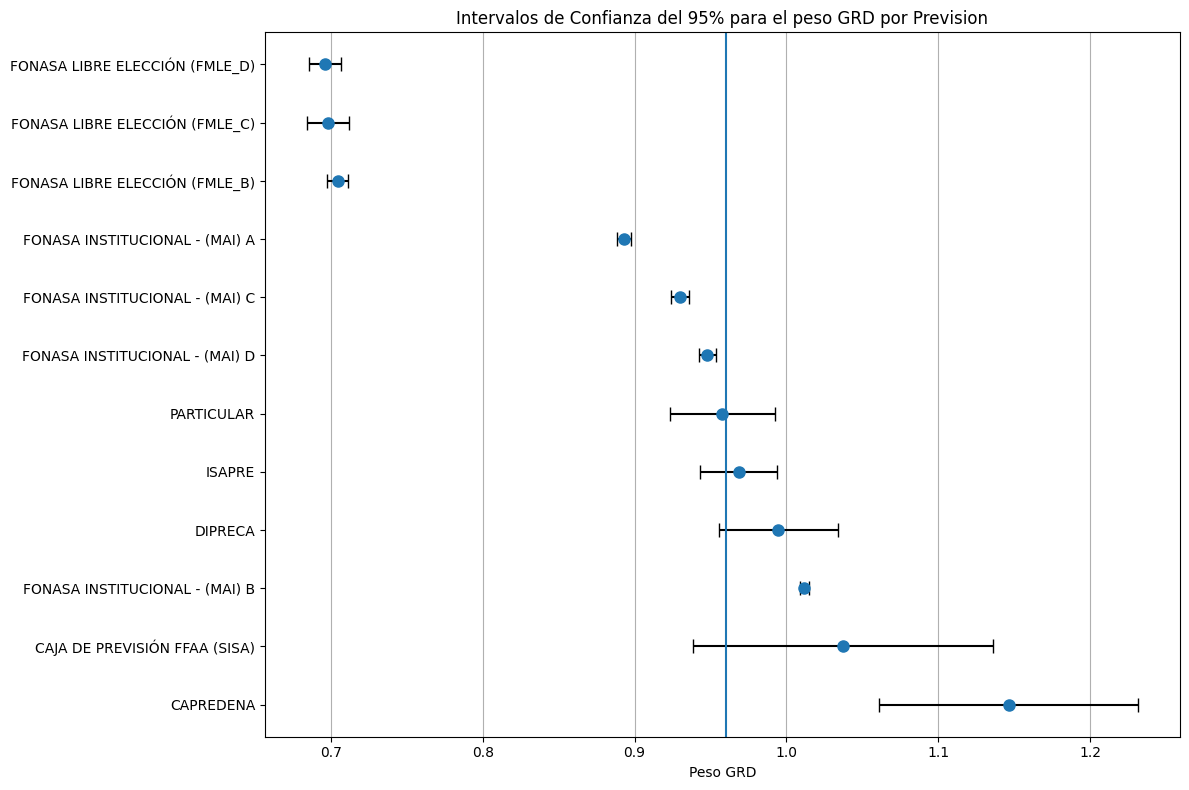

0.9601425824419132


In [6]:
promedio = np.mean(df["IR_29301_PESO"])

plt.figure(figsize=(12, 8))

plt.errorbar(
    calculos['PROMEDIO PESO_GRD'], calculos.index,
    xerr=[calculos['PROMEDIO PESO_GRD'] - calculos['INTERVALO CONFIANZA INF'], calculos['INTERVALO CONFIANZA SUP'] - calculos['PROMEDIO PESO_GRD']],
    fmt='o', capsize=5, capthick=1, ecolor='black', markersize=8
)

plt.yticks(calculos.index, calculos['PREVISION'])
plt.xlabel('Peso GRD')
plt.axvline(x = promedio)
plt.title('Intervalos de Confianza del 95% para el peso GRD por Prevision')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(promedio)

In [7]:
df["FECHAALTA"] = pd.to_datetime(df["FECHAALTA"], dayfirst=True)
df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"], dayfirst=True)

df["TIEMPO_ESTANCIA"] = (df["FECHAALTA"]-df["FECHA_INGRESO"])
df["TIEMPO_ESTANCIA"] = df["TIEMPO_ESTANCIA"].dt.days

df[["FECHAALTA","FECHA_INGRESO","TIEMPO_ESTANCIA"]].sample()

,FECHAALTA,FECHA_INGRESO,TIEMPO_ESTANCIA
520554,2023-07-23,2023-07-20,3


In [8]:
df['FECHA_NACIMIENTO'] = df[df['FECHA_NACIMIENTO'] != "DESCONOCIDO"]["FECHA_NACIMIENTO"]
df['FECHA_INGRESO'] = df[df['FECHA_INGRESO'] != "DESCONOCIDO"]["FECHA_INGRESO"]
df['FECHAALTA'] = df[df['FECHAALTA'] != "DESCONOCIDO"]["FECHAALTA"]

df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], dayfirst=True)
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], dayfirst=True)
df['FECHAALTA'] = pd.to_datetime(df['FECHAALTA'], dayfirst=True)
df['EDAD'] = ((df['FECHA_INGRESO'] - df['FECHA_NACIMIENTO']).dt.days / 365.25).round().astype('Int64')

C:\Users\Darienn\AppData\Local\Temp\ipykernel_34988\126420997.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], dayfirst=True)


In [9]:
datos = []

confianza = 0.95

for i in previsiones:
    dato_prevision = df[df["PREVISION"] == i]
    
    peso_grd = dato_prevision["TIEMPO_ESTANCIA"]
    promedio = np.mean(peso_grd)
    desv_est = np.std(peso_grd)
    
    grados_libertad = len(peso_grd) - 1
    
    err_est_muestral = desv_est/np.sqrt(len(peso_grd))
    
    lim_inf, lim_sup = scipy.stats.t.interval(confianza, grados_libertad, promedio, err_est_muestral)
    
    datos.append({
        "PREVISION" : i,
        "PROMEDIO ESTANCIA" : promedio,
        "DESV ESTANDAR ESTANCIA" : desv_est,
        "INTERVALO CONFIANZA INF" : lim_inf,
        "INTERVALO CONFIANZA SUP" : lim_sup
    })
    
calculos = pd.DataFrame(datos)

calculos = calculos.sort_values(by = "PROMEDIO ESTANCIA", ascending=False)
calculos = calculos.reset_index().drop("index", axis = "columns")


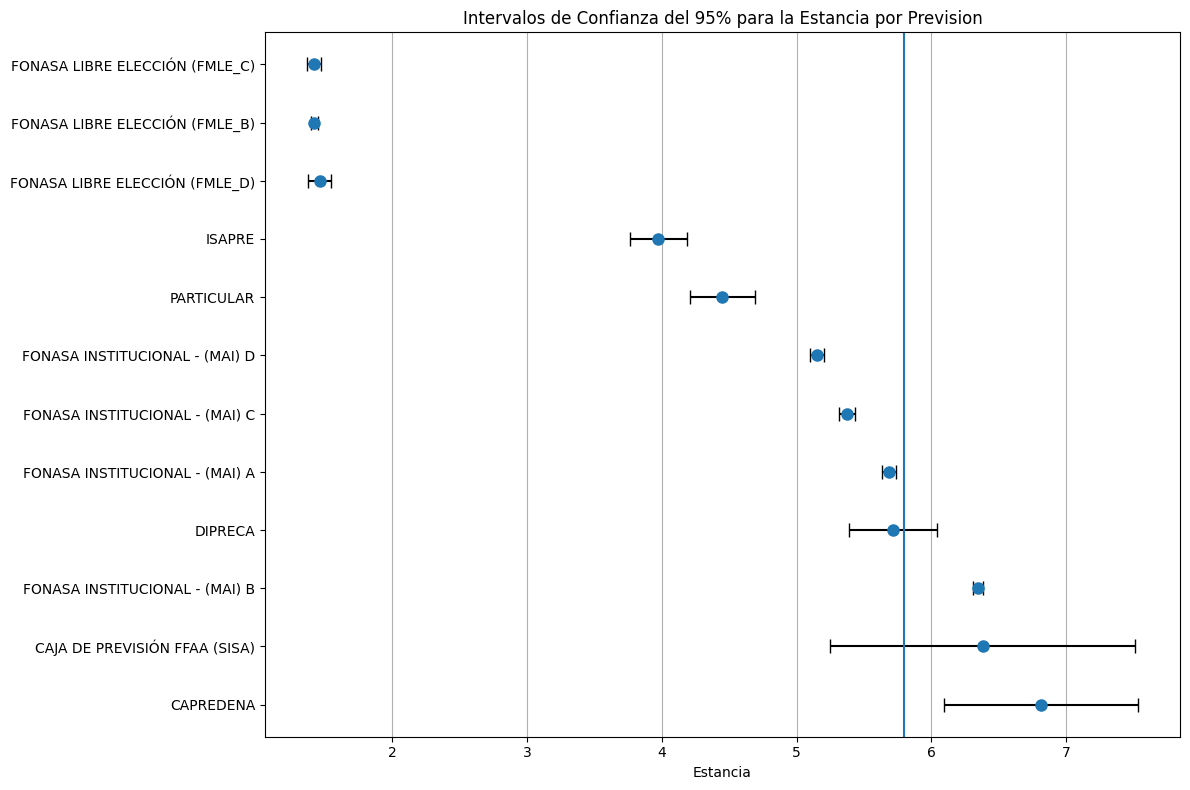

5.795155334272886


In [10]:
promedio = np.mean(df["TIEMPO_ESTANCIA"])

plt.figure(figsize=(12, 8))

plt.errorbar(
    calculos['PROMEDIO ESTANCIA'], calculos.index,
    xerr=[calculos['PROMEDIO ESTANCIA'] - calculos['INTERVALO CONFIANZA INF'], calculos['INTERVALO CONFIANZA SUP'] - calculos['PROMEDIO ESTANCIA']],
    fmt='o', capsize=5, capthick=1, ecolor='black', markersize=8
)

plt.yticks(calculos.index, calculos['PREVISION'])
plt.xlabel('Estancia')
plt.axvline(x = promedio)
plt.title('Intervalos de Confianza del 95% para la Estancia por Prevision')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(promedio)

In [11]:
diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"

    elif "ARAUCANÍA" in i: 
        diccionario[i] = "ARAUCANÍA"

    elif "VIÑA" in i or "VALPARAISO" in i or "ACONCAGUA" in i: 
        diccionario[i] = "VALPARAISO"

    elif "VALDIVIA" in i:
        diccionario[i] = "RIOS"

    elif "RELONCAVÍ" in i or "OSORNO" in i or "CHILOÉ" in i:
        diccionario[i] = "LAGOS"

    elif "TALCAHUANO" in i or "CONCEPCIÓN" in i or "BIOBIO" in i or "ARAUCO" in i:
        diccionario[i] = "BIOBIO"

    elif "IQUIQUE" in i:
        diccionario[i] = "TARAPACA"

    else:
        diccionario[i] = i

print(diccionario)

df["Region"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["Region"] != "DESCONOCIDO"]

{'VALDIVIA': 'RIOS', 'METROPOLITANO SURORIENTE': 'METROPOLITANO', 'VALPARAISO SAN ANTONIO': 'VALPARAISO', 'ACONCAGUA': 'VALPARAISO', 'METROPOLITANO ORIENTE': 'METROPOLITANO', 'COQUIMBO': 'COQUIMBO', 'DEL RELONCAVÍ': 'LAGOS', 'DEL MAULE': 'DEL MAULE', 'LIBERTADOR B. O HIGGINS': 'LIBERTADOR B. O HIGGINS', 'VIÑA DEL MAR QUILLOTA': 'VALPARAISO', 'ARAUCANÍA SUR': 'ARAUCANÍA', 'METROPOLITANO CENTRAL': 'METROPOLITANO', 'ARAUCANÍA NORTE': 'ARAUCANÍA', 'TALCAHUANO': 'BIOBIO', 'METROPOLITANO OCCIDENTE': 'METROPOLITANO', 'IQUIQUE': 'TARAPACA', 'OSORNO': 'LAGOS', 'ANTOFAGASTA': 'ANTOFAGASTA', 'CONCEPCIÓN': 'BIOBIO', 'ARICA': 'ARICA', 'ÑUBLE': 'ÑUBLE', 'ATACAMA': 'ATACAMA', 'AYSEN': 'AYSEN', 'METROPOLITANO SUR': 'METROPOLITANO', 'METROPOLITANO NORTE': 'METROPOLITANO', 'BIOBIO': 'BIOBIO', 'ARAUCO': 'BIOBIO', 'CHILOÉ': 'LAGOS', 'DESCONOCIDO': 'DESCONOCIDO', 'MAGALLANES': 'MAGALLANES'}


In [12]:
display(df["Region"].unique())

group = df.groupby(by=["Region","PREVISION"]).agg({
    "TIEMPO_ESTANCIA":"mean",
    "COD_HOSPITAL": "count"
})
group = group.rename(columns={"COD_HOSPITAL": "CANTIDAD"})

array(['RIOS', nan, 'VALPARAISO', 'COQUIMBO', 'LAGOS', 'DEL MAULE',
       'LIBERTADOR B. O HIGGINS', 'ARAUCANÍA', 'BIOBIO', 'TARAPACA',
       'ANTOFAGASTA', 'ARICA', 'ÑUBLE', 'ATACAMA', 'AYSEN', 'MAGALLANES'],
      dtype=object)

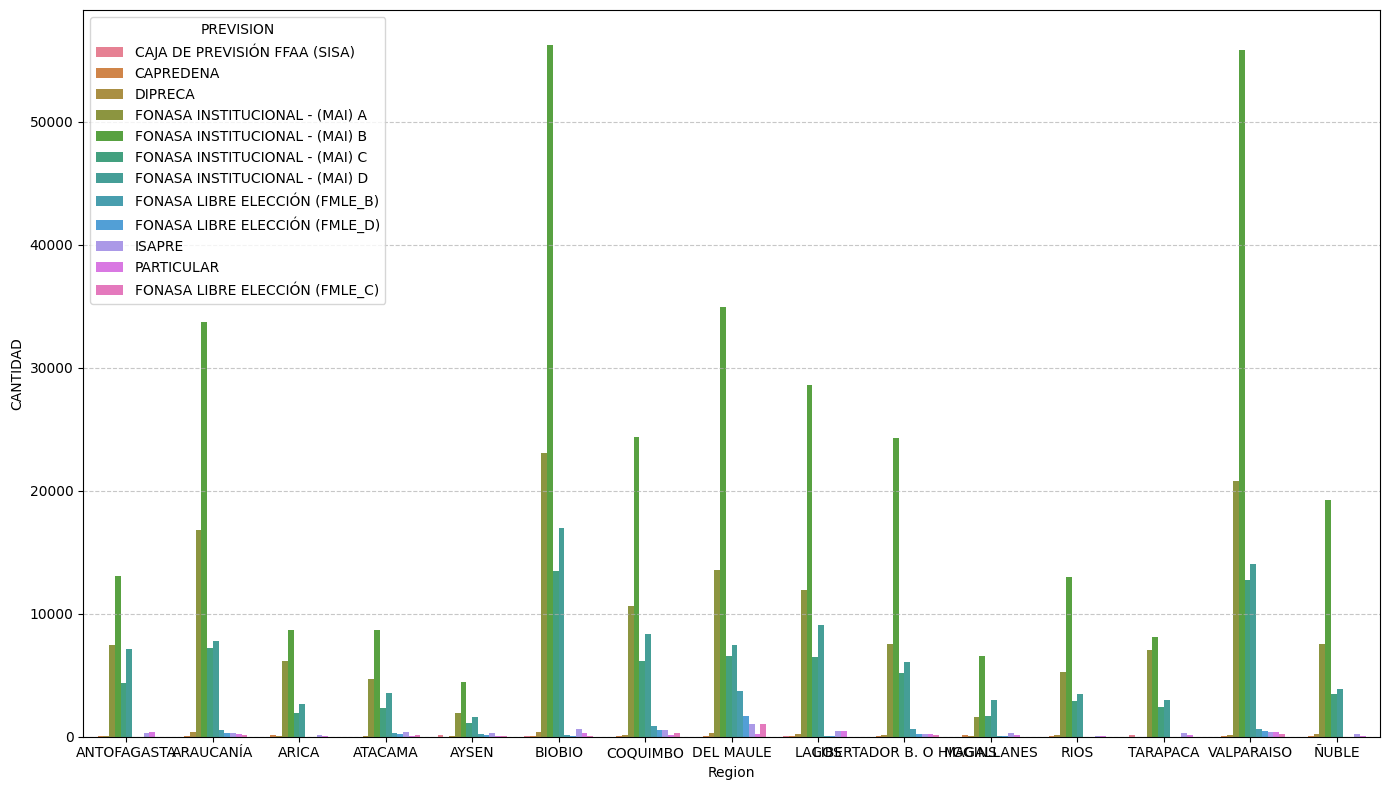

In [13]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='CANTIDAD', hue='PREVISION', data=group)
# plt.title('Estancia Media por Servicio de Salud y Severidad')
# plt.xlabel('Servicio de Salud')
# plt.ylabel('Estancia Media (días)')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Severidad')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

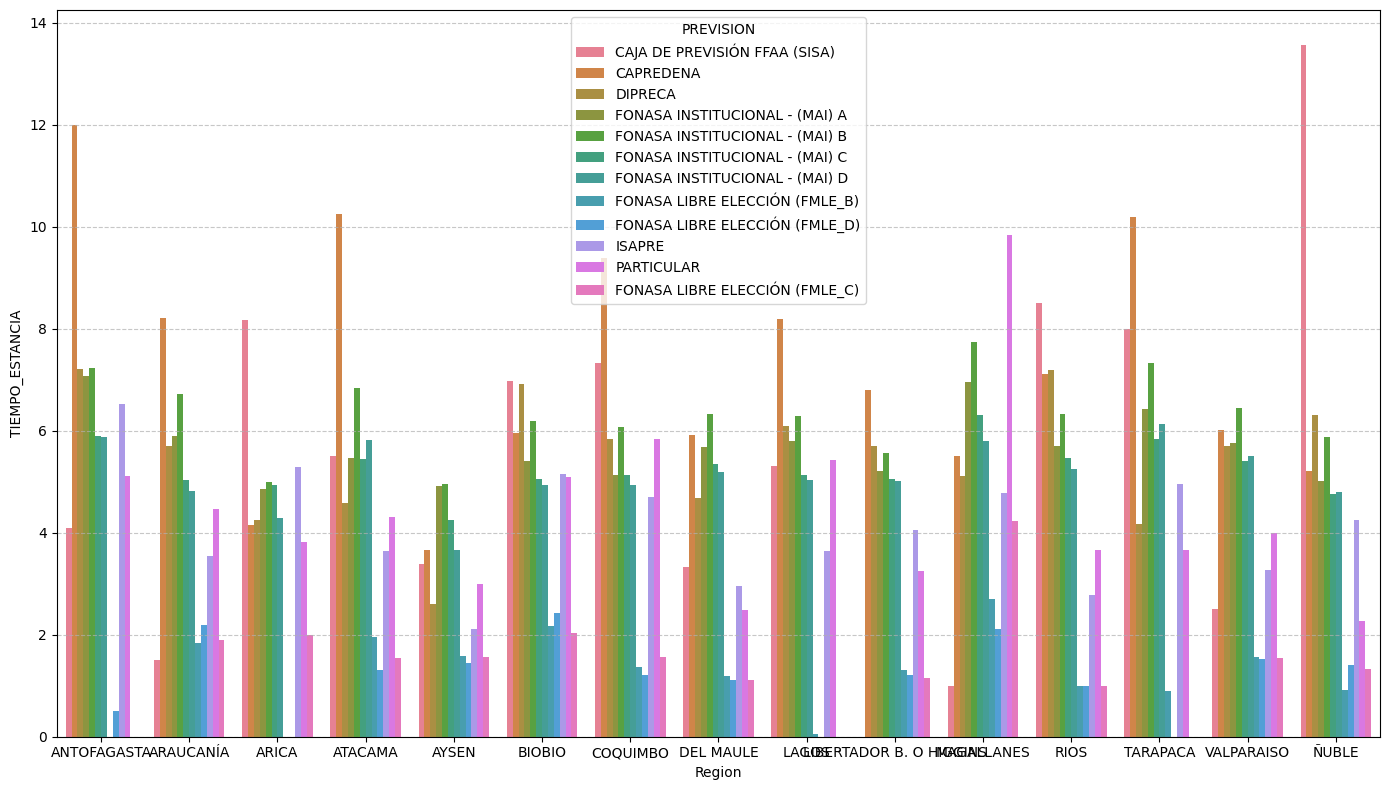

In [14]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='TIEMPO_ESTANCIA', hue='PREVISION', data=group)
# plt.title('Estancia Media por Servicio de Salud y Severidad')
# plt.xlabel('Servicio de Salud')
# plt.ylabel('Estancia Media (días)')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Severidad')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
regiones = df["Region"].unique()

datos = []

confianza = 0.95

for i in regiones:
    dato_prevision = df[df["Region"] == i]
    
    peso_grd = dato_prevision["TIEMPO_ESTANCIA"]
    promedio = np.mean(peso_grd)
    desv_est = np.std(peso_grd)
    
    grados_libertad = len(peso_grd) - 1
    
    err_est_muestral = desv_est/np.sqrt(len(peso_grd))
    
    lim_inf, lim_sup = scipy.stats.t.interval(confianza, grados_libertad, promedio, err_est_muestral)
    
    datos.append({
        "REGION" : i,
        "PROMEDIO ESTANCIA" : promedio,
        "DESV ESTANDAR ESTANCIA" : desv_est,
        "INTERVALO CONFIANZA INF" : lim_inf,
        "INTERVALO CONFIANZA SUP" : lim_sup
    })
    
calculos = pd.DataFrame(datos)

calculos = calculos.sort_values(by = "PROMEDIO ESTANCIA", ascending=False)
calculos = calculos.reset_index().drop("index", axis = "columns")


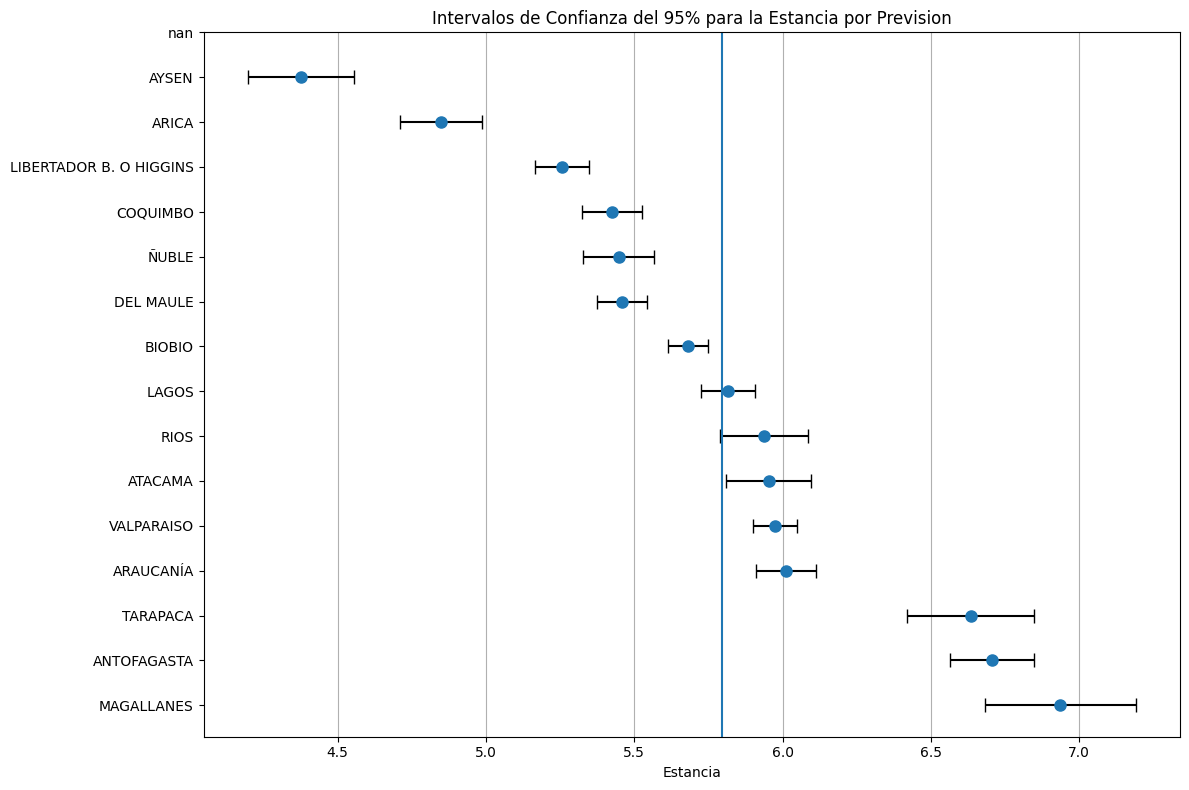

5.795155334272886


In [16]:
promedio = np.mean(df["TIEMPO_ESTANCIA"])

plt.figure(figsize=(12, 8))

plt.errorbar(
    calculos['PROMEDIO ESTANCIA'], calculos.index,
    xerr=[calculos['PROMEDIO ESTANCIA'] - calculos['INTERVALO CONFIANZA INF'], calculos['INTERVALO CONFIANZA SUP'] - calculos['PROMEDIO ESTANCIA']],
    fmt='o', capsize=5, capthick=1, ecolor='black', markersize=8
)

plt.yticks(calculos.index, calculos['REGION'])
plt.xlabel('Estancia')
plt.axvline(x = promedio)
plt.title('Intervalos de Confianza del 95% para la Estancia por Prevision')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(promedio)

Text(0.5, 1.0, 'Cantidad de Pacientes por Prevision')

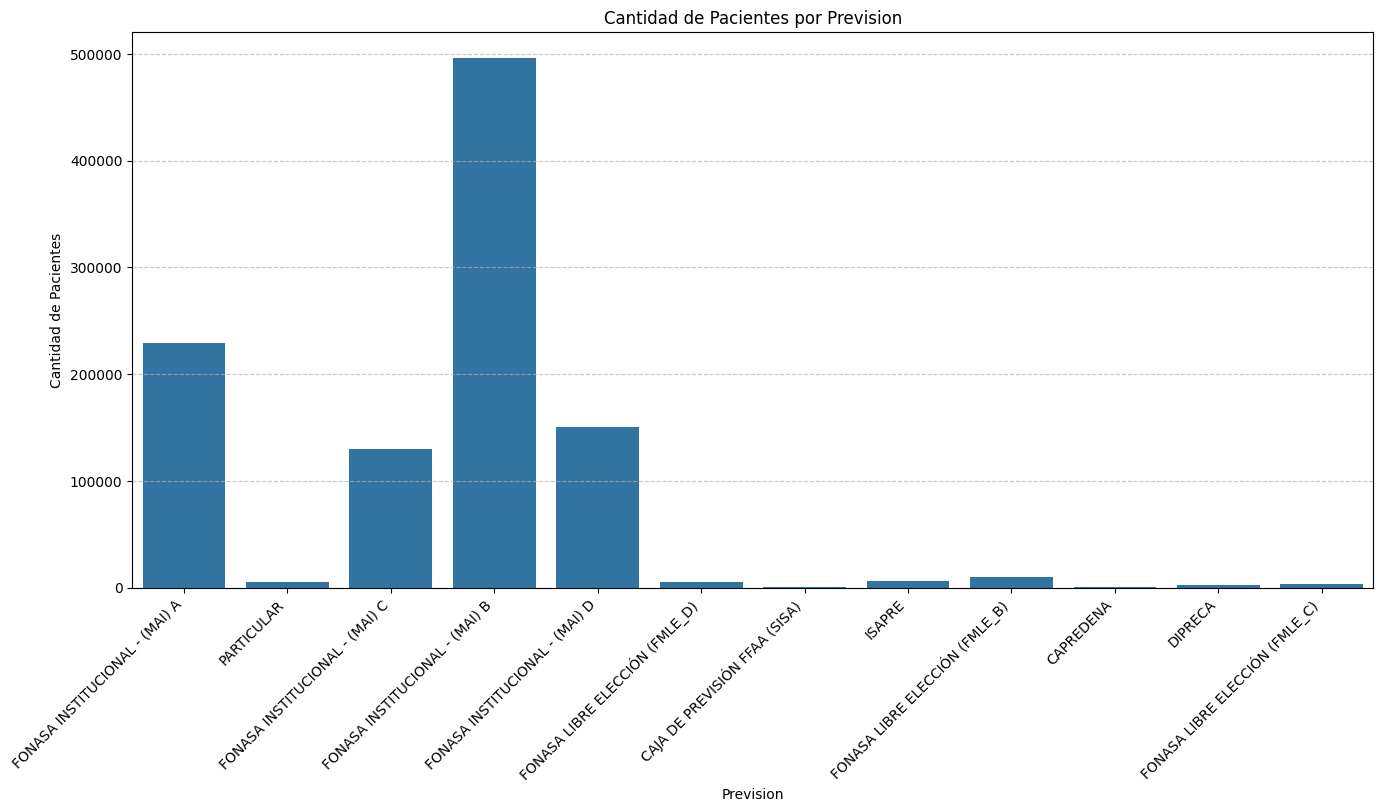

In [ ]:
# df.groupby(["PREVISION"]).count()["COD_HOSPITAL"].sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='PREVISION', y='COD_HOSPITAL', data=df, estimator=len, hue=)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prevision')
plt.ylabel('Cantidad de Pacientes')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title('Cantidad de Pacientes por Prevision')

---
### **Test A/B**

### **Pregunta Investigación**

¿Existe una diferencia entre el tiempo de estancia entre hospitales de la región metropolitana y los que están fuera de esta, para pacientes con características similares?

### **Definición Experimental**

**Población Objetivo:** Pacientes mayores de 18 años que se encuentran en el registro GRD de todo el país.

**Métricas Primarias:** Tiempo estancia, Tipo Región

**Métricas Secundarias/Confusoras:** 
- Edad
- Sexo 
- Tipo de Ingreso
- Previsión

**Criterios de Inclusión:**
- Pacientes mayores de 18 años
- Que tengan registro de su edad, sexo, tipo de ingreso.

**Criterios de exclusión:**
- Pacientes de los que no se conozca su previsión
- Pacientes que son atendidos en Servicios de Salud Públicos de Chile.

### **Diseño Estadístico**

**Tamaño Muestral Necesario**



In [17]:
from statsmodels.stats.power import TTestIndPower

# Definir parámetros
SD = 0.3  # tamaño del efecto (0.5 SD)
alpha = 0.05  # nivel de significancia
power = 0.8  # potencia deseada

# Calcular tamaño muestral por grupo
analysis = TTestIndPower()
sample_size_per_group = analysis.solve_power(effect_size=SD, alpha=alpha, power=power, alternative='two-sided')
total_sample_size = sample_size_per_group * 2

print(f"Tamaño muestral necesario por grupo: {round(sample_size_per_group)}")
print(f"Tamaño muestral total: {round(total_sample_size)}")

Tamaño muestral necesario por grupo: 175
Tamaño muestral total: 351


**Método de aleatorización**

Se categorizarán dos grupos a partir de la ubicación geografica del servicio de salud donde ocurra la atención.

In [22]:
valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"
    else:
        diccionario[i] = "PROVINCIA"
        
diccionario

df["TipoRegion"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["TipoRegion"] != "DESCONOCIDO"]

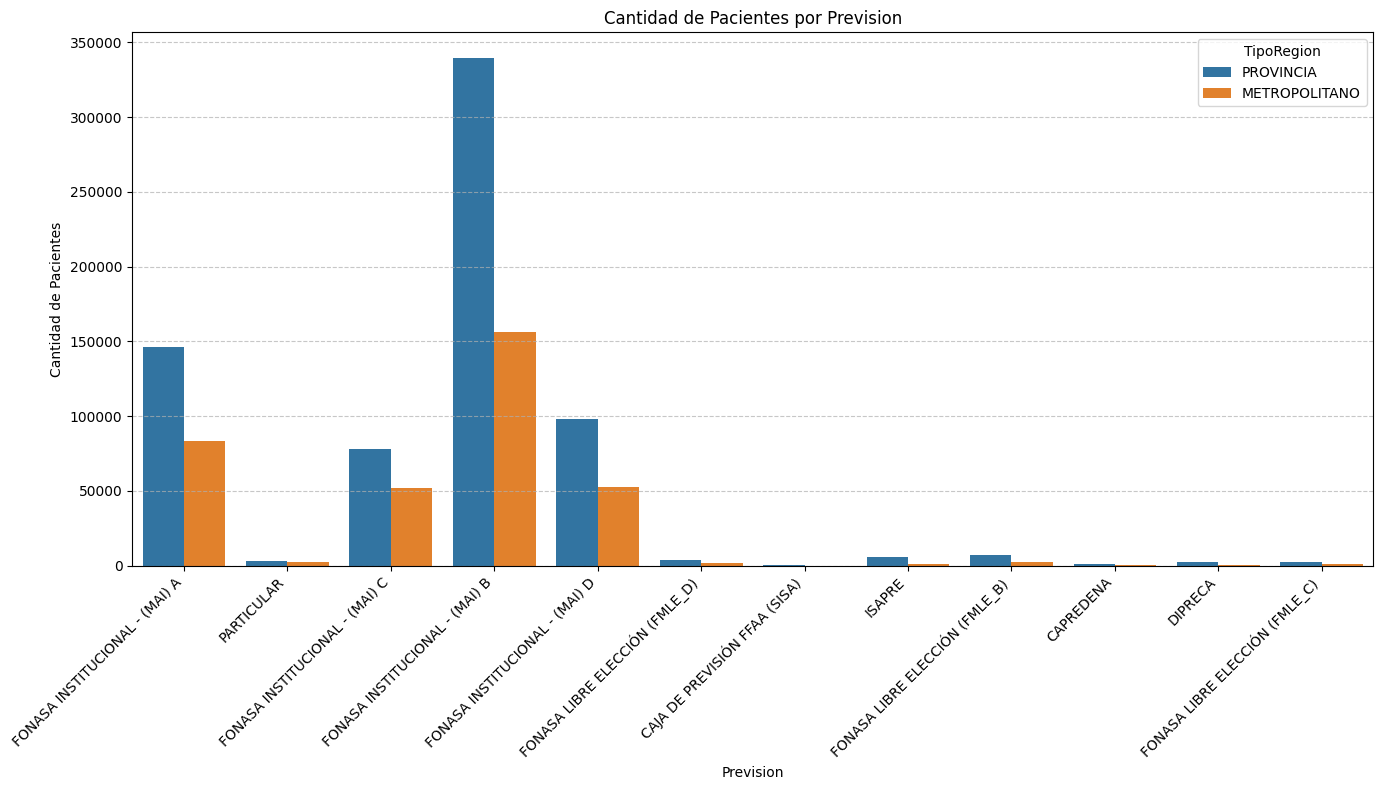

In [23]:
# df.groupby(["PREVISION"]).count()["COD_HOSPITAL"].sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='PREVISION', y='COD_HOSPITAL', data=df, estimator=len, hue="TipoRegion")
plt.title('Cantidad de Pacientes por Prevision')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prevision')
plt.ylabel('Cantidad de Pacientes')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


In [19]:
# Create a new column 'metropolitano' with 1 for 'METROPOLITANO' and 0 otherwise
df["metropolitano"] = (df["TipoRegion"] == "METROPOLITANO").astype(int)

# Split the dataframe into two groups based on the 'metropolitano' column
metropolitana = df[df['metropolitano'] == 1]
provincias = df[df['metropolitano'] == 0]

In [20]:
df.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO', 'ETNIA',
       'PROVINCIA', 'COMUNA', 'NACIONALIDAD', 'PREVISION', 'SERVICIO_SALUD',
       ...
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'HOSPPROCEDENCIA', 'TIEMPO_ESTANCIA', 'EDAD',
       'Region', 'TipoRegion', 'metropolitano'],
      dtype='object', length=134)

Límite inferior: -6.50
Límite superior: 13.50
Número de outliers: 106238
Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO', 'ETNIA',
       'PROVINCIA', 'COMUNA', 'NACIONALIDAD', 'PREVISION', 'SERVICIO_SALUD',
       ...
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'HOSPPROCEDENCIA', 'TIEMPO_ESTANCIA', 'EDAD',
       'Region', 'TipoRegion', 'metropolitano'],
      dtype='object', length=134)


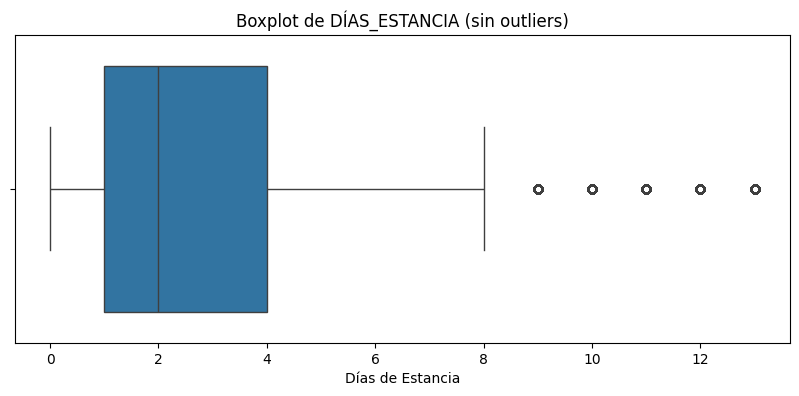

In [21]:
# Análisis de outliers en la variable TIEMPO_ESTANCIA
from matplotlib.ticker import ScalarFormatter

# Cálculo de límites usando el método IQR
q1 = df["TIEMPO_ESTANCIA"].quantile(0.25)
q3 = df["TIEMPO_ESTANCIA"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

# Identificación de outliers
outliers = df[(df["TIEMPO_ESTANCIA"] < limite_inferior) | (df["TIEMPO_ESTANCIA"] > limite_superior)]
print(f"Número de outliers: {len(outliers)}")

# DataFrame sin outliers
df_sin_outliers = df[(df["TIEMPO_ESTANCIA"] >= limite_inferior) & (df["TIEMPO_ESTANCIA"] <= limite_superior)]
print(df_sin_outliers.columns)
# Visualización sin outliers
plt.figure(figsize=(10, 4))
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')  # También ayuda a forzar notación normal
sns.boxplot(x=df_sin_outliers["TIEMPO_ESTANCIA"])
plt.title("Boxplot de DÍAS_ESTANCIA (sin outliers)")
plt.xlabel("Días de Estancia")
plt.show()

C:\Users\Darienn\AppData\Local\Temp\ipykernel_32256\1502839129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


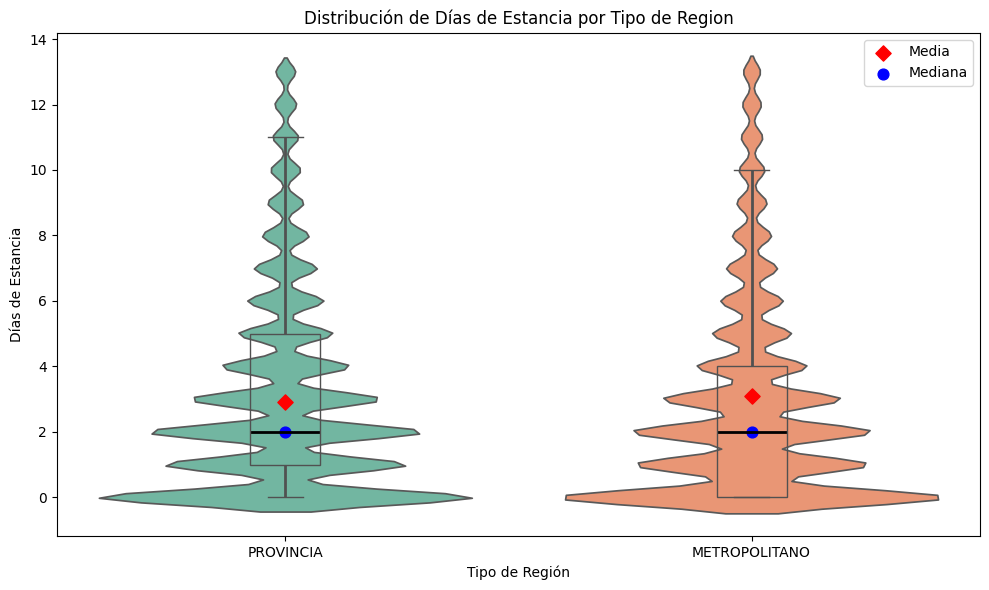

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_sin_outliers,
    x="TipoRegion",
    y="TIEMPO_ESTANCIA",
    inner=None,
    palette="Set2"
)
sns.boxplot(
    data=df_sin_outliers,
    x="TipoRegion",
    y="TIEMPO_ESTANCIA",
    width=0.15,
    showcaps=True,
    boxprops={'facecolor':'none', "zorder":10},
    showfliers=False,
    whiskerprops={'linewidth':2},
    medianprops={'color':'black', 'linewidth':2}
)

# Calcular medias y medianas por severidad
medias = df_sin_outliers.groupby("TipoRegion")["TIEMPO_ESTANCIA"].mean()
medianas = df_sin_outliers.groupby("TipoRegion")["TIEMPO_ESTANCIA"].median()

# Añadir puntos de media y mediana
for i, sev in enumerate(sorted(df_sin_outliers["TipoRegion"].unique())):
    plt.scatter(i, medias[sev], color="red", marker="D", s=60, label="Media" if i==0 else "")
    plt.scatter(i, medianas[sev], color="blue", marker="o", s=60, label="Mediana" if i==0 else "")

plt.xlabel("Tipo de Región")
plt.ylabel("Días de Estancia")
plt.title("Distribución de Días de Estancia por Tipo de Region")
plt.legend()
plt.tight_layout()
plt.show()

**Prueba Estadística Adecuada**

Prueba t para muestras indepencientes.

**Nivel de Significancia y Potencia Deseada**

Significancia de 0.05 y potencia deseada de 0.8.

In [23]:
print(df_sin_outliers.columns)
data = df_sin_outliers[["TipoRegion","TIPO_INGRESO","TIEMPO_ESTANCIA","EDAD","SEXO","PREVISION"]].dropna()
data["TipoRegion"].unique()

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO', 'ETNIA',
       'PROVINCIA', 'COMUNA', 'NACIONALIDAD', 'PREVISION', 'SERVICIO_SALUD',
       ...
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'HOSPPROCEDENCIA', 'TIEMPO_ESTANCIA', 'EDAD',
       'Region', 'TipoRegion', 'metropolitano'],
      dtype='object', length=134)


array(['PROVINCIA', 'METROPOLITANO'], dtype=object)

In [24]:
metropolitana = data[data["TipoRegion"] == "METROPOLITANO"]
provincias = data[data["TipoRegion"] == "PROVINCIA"]

provincias.sample(5)

,TipoRegion,TIPO_INGRESO,TIEMPO_ESTANCIA,EDAD,SEXO,PREVISION
608069,PROVINCIA,PROGRAMADA,0,72,MUJER,FONASA INSTITUCIONAL - (MAI) B
298840,PROVINCIA,URGENCIA,4,11,HOMBRE,FONASA INSTITUCIONAL - (MAI) C
742285,PROVINCIA,PROGRAMADA,0,41,HOMBRE,FONASA INSTITUCIONAL - (MAI) B
280293,PROVINCIA,URGENCIA,2,58,HOMBRE,FONASA INSTITUCIONAL - (MAI) B
897798,PROVINCIA,OBSTETRICA,4,37,MUJER,FONASA INSTITUCIONAL - (MAI) B


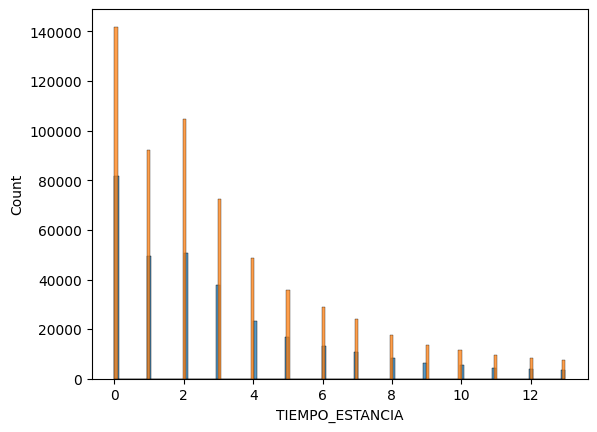

In [25]:
sns.histplot(metropolitana["TIEMPO_ESTANCIA"])
sns.histplot(provincias["TIEMPO_ESTANCIA"])
plt.show()

Prueba t para dos muestras independientes - Estancia por Tipo de Región
Hipótesis nula (H₀): No hay diferencia entre la estancia media de un recinto de la región Metropolitana y Provincia
Hipótesis alternativa (H₁): Hay diferencia entre la estancia media de un recinto de Antofagasta y Concepción
Media Estancia Antofagasta: 3.1076
Media Estancia Concepción: 2.9006
Diferencia de medias: 0.2070
Prueba de Levene para igualdad de varianzas: p=0.0000 (varianzas diferentes)
Estadística t: 30.3574
Valor p: 0.0000
Decisión: Rechazamos la hipótesis nula (p < 0.05)
Conclusión: Existe una diferencia significativa en la estancia media entre Antofagasta y Concepción

Tamaño del efecto (d de Cohen): 0.066
Efecto pequeño


C:\Users\Darienn\AppData\Local\Temp\ipykernel_32256\4068167989.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['metropolitana', 'provincia'], patch_artist=True,


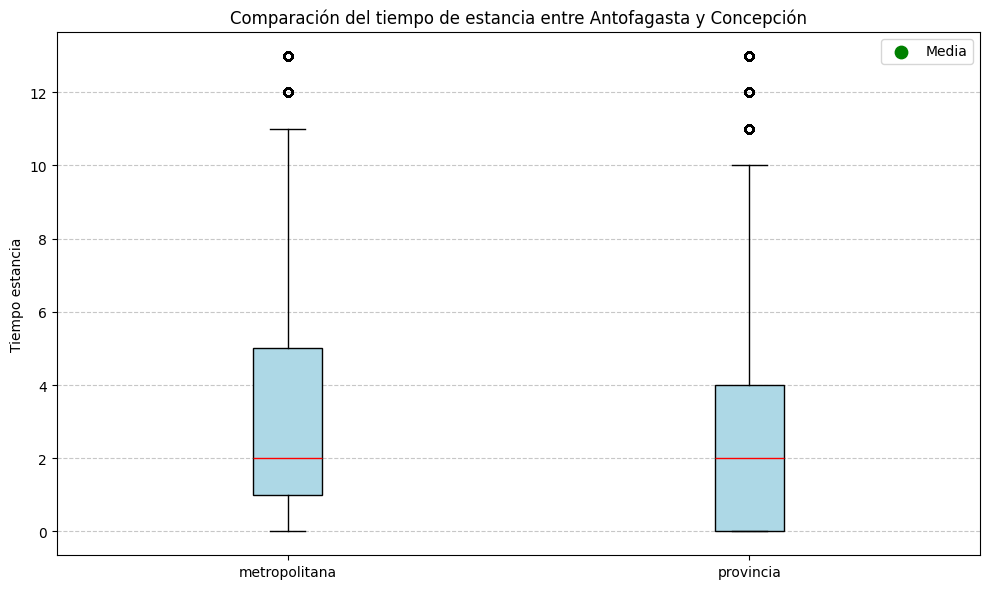

C:\Users\Darienn\AppData\Local\Temp\ipykernel_32256\4068167989.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TipoRegion', y='TIEMPO_ESTANCIA', data=data, inner='box', palette='pastel')


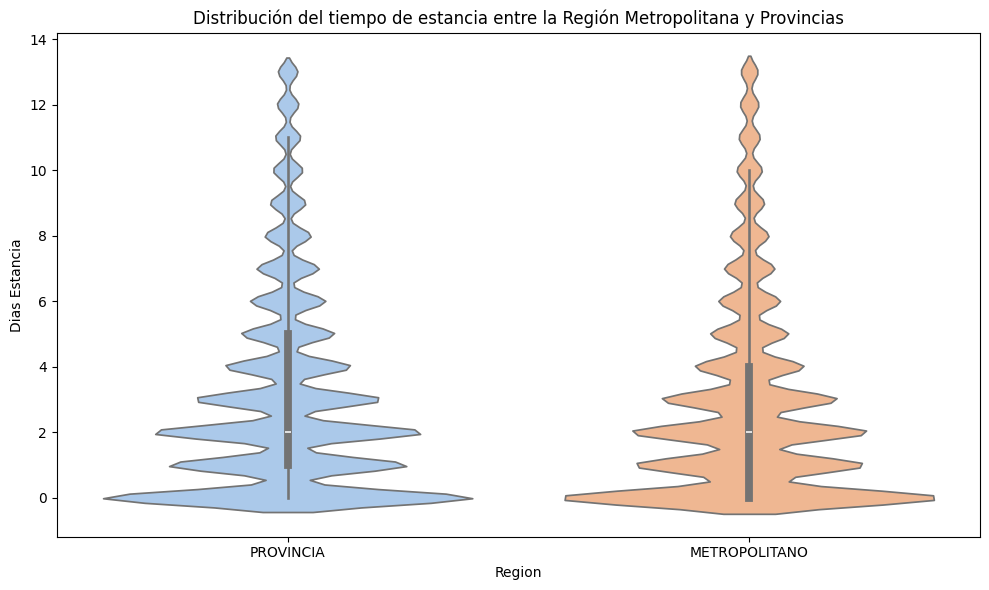

In [26]:
from scipy import stats
grupob = metropolitana["TIEMPO_ESTANCIA"]
grupoa = provincias["TIEMPO_ESTANCIA"]


# Realizar la prueba t para muestras independientes
# Primero verificamos si podemos asumir varianzas iguales con la prueba de Levene
levene_stat, levene_pval = stats.levene(grupoa, grupob)
equal_var = levene_pval >= 0.05  # True si podemos asumir varianzas iguales

# Prueba t para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(grupoa, grupob, equal_var=equal_var)

# Mostrar resultados
print(f"Prueba t para dos muestras independientes - Estancia por Tipo de Región")
print(f"Hipótesis nula (H₀): No hay diferencia entre la estancia media de un recinto de la región Metropolitana y Provincia")
print(f"Hipótesis alternativa (H₁): Hay diferencia entre la estancia media de un recinto de Antofagasta y Concepción")
print(f"Media Estancia Antofagasta: {grupoa.mean():.4f}")
print(f"Media Estancia Concepción: {grupob.mean():.4f}")
print(f"Diferencia de medias: {grupoa.mean() - grupob.mean():.4f}")
print(f"Prueba de Levene para igualdad de varianzas: p={levene_pval:.4f} ({'varianzas iguales' if equal_var else 'varianzas diferentes'})")
print(f"Estadística t: {t_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")

# Decisión estadística
alpha = 0.05
if p_valor < alpha:
    print(f"Decisión: Rechazamos la hipótesis nula (p < {alpha})")
    print(f"Conclusión: Existe una diferencia significativa en la estancia media entre Antofagasta y Concepción")
else:
    print(f"Decisión: No rechazamos la hipótesis nula (p ≥ {alpha})")
    print(f"Conclusión: No hay evidencia suficiente para afirmar que existe diferencia en la estancia media entre Antofagasta y Concepción")

efecto = (grupoa.mean() - grupob.mean()) / np.sqrt((grupoa.std()**2 + grupob.std()**2) / 2)
print(f"\nTamaño del efecto (d de Cohen): {efecto:.3f}")
if abs(efecto) < 0.2:
    print("Efecto pequeño")
elif abs(efecto) < 0.5:
    print("Efecto mediano")
else:
    print("Efecto grande")

# Visualización
plt.figure(figsize=(10, 6))
box_data = [grupoa, grupob]
plt.boxplot(box_data, labels=['metropolitana', 'provincia'], patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Comparación del tiempo de estancia entre Antofagasta y Concepción')
plt.ylabel('Tiempo estancia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir las medias como puntos
plt.scatter([1, 2], [grupoa.mean(), grupob.mean()], 
           color='green', marker='o', s=80, label='Media')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico alternativo con violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='TipoRegion', y='TIEMPO_ESTANCIA', data=data, inner='box', palette='pastel')
plt.title('Distribución del tiempo de estancia entre la Región Metropolitana y Provincias')
plt.xlabel('Region')
plt.ylabel('Dias Estancia')
plt.tight_layout()
plt.show()

In [27]:
data

,TipoRegion,TIPO_INGRESO,TIEMPO_ESTANCIA,EDAD,SEXO,PREVISION
0,PROVINCIA,URGENCIA,2,43,HOMBRE,FONASA INSTITUCIONAL - (MAI) A
1,METROPOLITANO,URGENCIA,6,22,HOMBRE,PARTICULAR
2,METROPOLITANO,URGENCIA,1,3,HOMBRE,FONASA INSTITUCIONAL - (MAI) A
3,PROVINCIA,PROGRAMADA,1,45,MUJER,FONASA INSTITUCIONAL - (MAI) C
4,PROVINCIA,URGENCIA,2,0,MUJER,FONASA INSTITUCIONAL - (MAI) B
...,...,...,...,...,...,...
1039582,PROVINCIA,OBSTETRICA,3,27,MUJER,FONASA INSTITUCIONAL - (MAI) D
1039583,PROVINCIA,PROGRAMADA,0,32,MUJER,FONASA INSTITUCIONAL - (MAI) D
1039584,PROVINCIA,URGENCIA,2,9,HOMBRE,FONASA INSTITUCIONAL - (MAI) A
1039585,PROVINCIA,PROGRAMADA,0,9,HOMBRE,FONASA INSTITUCIONAL - (MAI) A


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def propensity_score_calculo(df, columna, valor_columna_a_comparar_1, valor_columna_a_comparar_2, lista_var_confusoras):

    valores_comparacion = [valor_columna_a_comparar_1, valor_columna_a_comparar_2]
    datos = df[df[columna].isin(valores_comparacion)].copy()
    datos["tratamiento"] = (datos[columna] == valor_columna_a_comparar_1).astype(int)
    X = datos[lista_var_confusoras].copy()
    lista_str = [x for x in lista_var_confusoras if datos[x].dtype == "object"]

    if lista_str:
        X = pd.get_dummies(X, columns=lista_str, drop_first=True)

    y = datos["tratamiento"]
    mask = X.notnull().all(axis=1) & y.notnull()
    X = X[mask]
    y = y[mask]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    modelo_ps = LogisticRegression(random_state=42)
    modelo_ps.fit(X_scaled, y)
    datos.loc[X.index, 'propensity_score'] = modelo_ps.predict_proba(X_scaled)[:, 1]
    datos = datos[mask]

    return datos

pdf = propensity_score_calculo(data, "TipoRegion", "METROPOLITANO", "PROVINCIA", ["EDAD","SEXO","PREVISION"])

In [29]:
pdf.sample(5)

,TipoRegion,TIPO_INGRESO,TIEMPO_ESTANCIA,EDAD,SEXO,PREVISION,tratamiento,propensity_score
756042,PROVINCIA,PROGRAMADA,0,32,MUJER,FONASA INSTITUCIONAL - (MAI) A,0,0.366665
335996,METROPOLITANO,URGENCIA,1,20,HOMBRE,FONASA INSTITUCIONAL - (MAI) B,1,0.308033
50457,PROVINCIA,URGENCIA,1,1,MUJER,FONASA INSTITUCIONAL - (MAI) A,0,0.368888
870869,METROPOLITANO,URGENCIA,4,64,HOMBRE,FONASA INSTITUCIONAL - (MAI) A,1,0.350621
704734,PROVINCIA,URGENCIA,2,28,MUJER,FONASA INSTITUCIONAL - (MAI) B,0,0.320406


In [30]:
def match_propensity_scores(df, treatment_col='tratamiento', score_col='propensity_score', caliper=0.05):
    """
    Realiza matching por propensity score con un caliper dado.

    Parámetros:
    -----------
    df : DataFrame
        DataFrame con los datos
    treatment_col : str
        Nombre de la columna que indica el tratamiento (1) o control (0)
    score_col : str
        Nombre de la columna con propensity scores
    caliper : float
        Distancia máxima permitida para el matching

    Retorna:
    --------
    DataFrame con los pares matcheados
    """
    # Separar tratamiento y control
    treated = df[df[treatment_col] == 1].copy()
    control = df[df[treatment_col] == 0].copy()

    # Almacenar índices de matches (usar índices originales)
    treated_indices = []
    control_indices = []

    # Para cada caso tratado, encontrar el control más cercano
    available_controls = control.copy()
    for treated_idx, treated_row in treated.iterrows():
        ps_treated = treated_row[score_col]
        available_controls['distance'] = abs(available_controls[score_col] - ps_treated)

        # Si hay controles disponibles
        if not available_controls.empty:
            best_match_idx = available_controls['distance'].idxmin()
            best_match_distance = available_controls.loc[best_match_idx, 'distance']

            # Verificar caliper
            if best_match_distance < caliper:
                treated_indices.append(treated_idx)
                control_indices.append(best_match_idx)

                # Eliminar el control usado para no reutilizarlo
                available_controls = available_controls.drop(best_match_idx)

    # Crear DataFrame con los pares matcheados usando los índices originales
    matched_treated = treated.loc[treated_indices].reset_index(drop=True)
    matched_control = control.loc[control_indices].reset_index(drop=True)

    return matched_treated, matched_control

# 6. Realizar el matching

treated_matched, control_matched = match_propensity_scores(pdf[:1000000])
print(f"Número de pares matcheados: {len(treated_matched)}")

Número de pares matcheados: 315340


In [31]:
from scipy.stats import ttest_rel

def t_test_pareado(treated, control, variable):
    """
    Realiza una prueba t pareada entre dos grupos (tratamiento y control).

    Parámetros:
    - treated: DataFrame del grupo de tratamiento emparejado.
    - control: DataFrame del grupo de control emparejado.
    - variable: nombre de la columna (string) sobre la que se evalúa la diferencia.

    Retorna:
    - Media grupo tratado
    - Media grupo control
    - Diferencia de medias
    - Estadístico t
    - Valor p
    """
    if len(treated) != len(control):
        raise ValueError("Los dataframes deben tener el mismo número de observaciones emparejadas.")
    
    dif = treated[variable] - control[variable]
    t_stat, p_value = ttest_rel(treated[variable], control[variable])
    
    print(f"Media {variable} - Tratamiento: {treated[variable].mean():.4f}")
    print(f"Media {variable} - Control:     {control[variable].mean():.4f}")
    print(f"Diferencia de medias:            {dif.mean():.4f}")
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    
    if p_value < 0.05:
        print("Resultado: La diferencia es estadísticamente significativa.")
    else:
        print("Resultado: No se encontró una diferencia estadísticamente significativa.")
    
    return t_stat, p_value

t_test_pareado(treated_matched,control_matched,"TIEMPO_ESTANCIA")

Media TIEMPO_ESTANCIA - Tratamiento: 2.9006
Media TIEMPO_ESTANCIA - Control:     3.1468
Diferencia de medias:            -0.2462
t = -31.9347, p = 0.0000
Resultado: La diferencia es estadísticamente significativa.


(np.float64(-31.93472131279895), np.float64(2.0080935538552576e-223))

In [32]:
valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"
    else:
        diccionario[i] = i
        
display(diccionario)

df["SERVICIO_SALUD"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["SERVICIO_SALUD"] != "DESCONOCIDO"]
df = df[df["PREVISION"] != "DESCONOCIDO"]

{'VALDIVIA': 'VALDIVIA',
 'METROPOLITANO': 'METROPOLITANO',
 'VALPARAISO SAN ANTONIO': 'VALPARAISO SAN ANTONIO',
 'ACONCAGUA': 'ACONCAGUA',
 'COQUIMBO': 'COQUIMBO',
 'DEL RELONCAVÍ': 'DEL RELONCAVÍ',
 'DEL MAULE': 'DEL MAULE',
 'LIBERTADOR B. O HIGGINS': 'LIBERTADOR B. O HIGGINS',
 'VIÑA DEL MAR QUILLOTA': 'VIÑA DEL MAR QUILLOTA',
 'ARAUCANÍA SUR': 'ARAUCANÍA SUR',
 'ARAUCANÍA NORTE': 'ARAUCANÍA NORTE',
 'TALCAHUANO': 'TALCAHUANO',
 'IQUIQUE': 'IQUIQUE',
 'OSORNO': 'OSORNO',
 'ANTOFAGASTA': 'ANTOFAGASTA',
 'CONCEPCIÓN': 'CONCEPCIÓN',
 'ARICA': 'ARICA',
 'ÑUBLE': 'ÑUBLE',
 'ATACAMA': 'ATACAMA',
 'AYSEN': 'AYSEN',
 'BIOBIO': 'BIOBIO',
 'ARAUCO': 'ARAUCO',
 'CHILOÉ': 'CHILOÉ',
 'MAGALLANES': 'MAGALLANES'}

In [33]:
diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"

    elif "ARAUCANÍA" in i: 
        diccionario[i] = "ARAUCANÍA"

    elif "VIÑA" in i or "VALPARAISO" in i or "ACONCAGUA" in i: 
        diccionario[i] = "VALPARAISO"

    elif "VALDIVIA" in i:
        diccionario[i] = "RIOS"

    elif "RELONCAVÍ" in i or "OSORNO" in i or "CHILOÉ" in i:
        diccionario[i] = "LAGOS"

    elif "TALCAHUANO" in i or "CONCEPCIÓN" in i or "BIOBIO" in i or "ARAUCO" in i:
        diccionario[i] = "BIOBIO"

    elif "IQUIQUE" in i:
        diccionario[i] = "TARAPACA"

    else:
        diccionario[i] = i

print(diccionario)

df["Region"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["Region"] != "DESCONOCIDO"]

{'VALDIVIA': 'RIOS', 'METROPOLITANO': 'METROPOLITANO', 'VALPARAISO SAN ANTONIO': 'VALPARAISO', 'ACONCAGUA': 'VALPARAISO', 'COQUIMBO': 'COQUIMBO', 'DEL RELONCAVÍ': 'LAGOS', 'DEL MAULE': 'DEL MAULE', 'LIBERTADOR B. O HIGGINS': 'LIBERTADOR B. O HIGGINS', 'VIÑA DEL MAR QUILLOTA': 'VALPARAISO', 'ARAUCANÍA SUR': 'ARAUCANÍA', 'ARAUCANÍA NORTE': 'ARAUCANÍA', 'TALCAHUANO': 'BIOBIO', 'IQUIQUE': 'TARAPACA', 'OSORNO': 'LAGOS', 'ANTOFAGASTA': 'ANTOFAGASTA', 'CONCEPCIÓN': 'BIOBIO', 'ARICA': 'ARICA', 'ÑUBLE': 'ÑUBLE', 'ATACAMA': 'ATACAMA', 'AYSEN': 'AYSEN', 'BIOBIO': 'BIOBIO', 'ARAUCO': 'BIOBIO', 'CHILOÉ': 'LAGOS', 'MAGALLANES': 'MAGALLANES'}
